# MadMiner particle physics tutorial

# Part 4b: The Fisher information

Johann Brehmer, Felix Kling, Irina Espejo, and Kyle Cranmer 2018-2019

## 0. Preparations

In [17]:
from __future__ import absolute_import, division, print_function, unicode_literals

import six
import logging
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from madminer.fisherinformation import FisherInformation
from madminer.plotting import plot_fisher_information_contours_2d


In [18]:
# MadMiner output
logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

## 1. Calculating the Fisher information from a SALLY model

We can use SALLY estimators (see part 3b of this tutorial) not just to define optimal observables, but also to calculate the (expected) Fisher information in a process. In `madminer.fisherinformation` we provide the `FisherInformation` class that makes this more convenient.

In [19]:
# fisher = FisherInformation('data/lhe_data_shuffled.h5')
fisher = FisherInformation('data_pp/delphes_data_shuffled.h5')

17:02 madminer.analysis.da INFO    Loading data from data_pp/delphes_data_shuffled.h5
17:02 madminer.analysis.da INFO    Found 2 parameters
17:02 madminer.analysis.da INFO    Did not find nuisance parameters
17:02 madminer.analysis.da INFO    Found 6 benchmarks, of which 6 physical
17:02 madminer.analysis.da INFO    Found 12 observables
17:02 madminer.analysis.da INFO    Found 116651 events
17:02 madminer.analysis.da INFO      60564 signal events sampled from benchmark sm
17:02 madminer.analysis.da INFO      14606 signal events sampled from benchmark w
17:02 madminer.analysis.da INFO      14611 signal events sampled from benchmark neg_w
17:02 madminer.analysis.da INFO      13316 signal events sampled from benchmark ww
17:02 madminer.analysis.da INFO      13554 signal events sampled from benchmark neg_ww
17:02 madminer.analysis.da INFO    Found morphing setup with 6 components
17:02 madminer.analysis.da INFO    Did not find nuisance morphing setup


This class provides different functions:
- `rate_information()` calculates the Fisher information in total rates,
- `histo_information()` calculates the Fisher information in 1D histograms,
- `histo_information_2d()` calculates the Fisher information in 2D histograms,
- `full_information()` calculates the full detector-level Fisher information using a SALLY estimator, and
- `truth_information()` calculates the truth-level Fisher information.

Here we use the SALLY approach:

In [20]:
info_sally, _ = fisher.full_information(
    theta=[0.,0.],
    model_file='models/sally',
    luminosity=300.*1000.,
)

print('Fisher information after 300 ifb:\n{}'.format(info_sally))

17:02 madminer.ml.base     INFO    Loading model from models/sally
17:02 madminer.fisherinfor INFO    Found 2 parameters in Score Estimator model, matching 2 physical parameters in MadMiner file
17:02 madminer.fisherinfor INFO    Evaluating rate Fisher information
17:03 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 1
17:03 madminer.ml.base     INFO    Loading evaluation data
17:03 madminer.ml.base     INFO    Calculating Fisher information


Fisher information after 300 ifb:
[[4.10166856e+02 3.82112605e-02]
 [3.82112605e-02 2.37897254e-04]]


For comparison, we can calculate the Fisher information in the histogram of observables:

In [21]:
info_histo_1d, cov_histo_1d = fisher.histo_information(
    theta=[0.,0.],
    luminosity=300.*1000.,
    observable="pt_j1",
    bins=[30.,100.,200.,400.],
    histrange=[30.,400.],
)

print('Histogram Fisher information after 300 ifb:\n{}'.format(info_histo_1d))

17:03 madminer.fisherinfor INFO    Bins with largest statistical uncertainties on rates:
17:03 madminer.fisherinfor INFO      Bin 1: (0.00725 +/- 0.00122) fb (17 %)
17:03 madminer.fisherinfor INFO      Bin 3: (1.06702 +/- 0.08213) fb (8 %)
17:03 madminer.fisherinfor INFO      Bin 5: (0.50303 +/- 0.01840) fb (4 %)
17:03 madminer.fisherinfor INFO      Bin 2: (0.72809 +/- 0.02477) fb (3 %)
17:03 madminer.fisherinfor INFO      Bin 4: (0.90237 +/- 0.02529) fb (3 %)


Histogram Fisher information after 300 ifb:
[[3.21486227e+02 9.82834420e-06]
 [9.82834420e-06 3.00541195e-13]]


We can do the same thing in 2D:

In [22]:
info_histo_2d, cov_histo_2d = fisher.histo_information_2d(
    theta=[0.,0.],
    luminosity=300.*1000.,
    observable1="pt_j1",
    bins1=[30.,100.,200.,400.],
    histrange1=[30.,400.],
    observable2="delta_phi_jj",
    bins2=5,
    histrange2=[0,6.2],
)

print('Histogram Fisher information after 300 ifb:\n{}'.format(info_histo_2d))

17:03 madminer.fisherinfor INFO    Bins with largest statistical uncertainties on rates:
17:03 madminer.fisherinfor INFO      Bin (1, 4): (0.00096 +/- 0.00068) fb (71 %)
17:03 madminer.fisherinfor INFO      Bin (1, 3): (0.00182 +/- 0.00077) fb (43 %)
17:03 madminer.fisherinfor INFO      Bin (1, 2): (0.00126 +/- 0.00037) fb (29 %)
17:03 madminer.fisherinfor INFO      Bin (3, 2): (0.35930 +/- 0.07881) fb (22 %)
17:03 madminer.fisherinfor INFO      Bin (1, 1): (0.00321 +/- 0.00053) fb (17 %)


Histogram Fisher information after 300 ifb:
[[3.22179737e+02 9.85255831e-06]
 [9.85255831e-06 3.01420727e-13]]


## 2. Calculating the Fisher information from a SALLY model

We can also calculate the Fisher Information using an ALICES model

In [23]:
info_alices, _ = fisher.full_information(
    theta=[0.,0.],
    model_file='models/alices',
    luminosity=300.*1000.,
)

print('Fisher information using ALICES after 300 ifb:\n{}'.format(info_alices))

17:03 madminer.ml.base     INFO    Loading model from models/alices
17:03 madminer.fisherinfor INFO    Found 2 parameters in Parameterized Ratio Estimator model, matching 2 physical parameters in MadMiner file
17:03 madminer.fisherinfor INFO    Evaluating rate Fisher information
17:03 madminer.fisherinfor INFO    Evaluating kinematic Fisher information on batch 1 / 1
17:03 madminer.ml.base     INFO    Loading evaluation data
17:03 madminer.ml.base     INFO    Calculating Fisher information


Fisher information using ALICES after 300 ifb:
[[ 4.07171620e+02 -3.57622840e-01]
 [-3.57622840e-01  4.91292115e-02]]


## 3. Plot Fisher distances

We also provide a convenience function to plot contours of constant Fisher distance `d^2(theta, theta_ref) = I_ij(theta_ref) * (theta-theta_ref)_i * (theta-theta_ref)_j`:

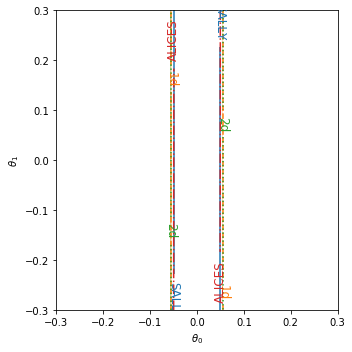

In [24]:
_ = plot_fisher_information_contours_2d(
    [info_sally, info_histo_1d, info_histo_2d,info_alices],
    [None, cov_histo_1d, cov_histo_2d,None],
    inline_labels=["SALLY", "1d", "2d","ALICES"],
    xrange=(-0.3,0.3),
    yrange=(-0.3,0.3)
)